# 불러오기

In [ ]:
!pip install kats

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import *

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [3]:
from kats.consts import TimeSeriesData
from kats.models.prophet import ProphetModel, ProphetParams

# KATS

In [36]:
df_17=pd.read_csv('/content/drive/MyDrive/미니프로젝트5차_생활인구 4_5일차/캐글/aivle-school-5th-mini-project/test2017.csv')
df_17.head()

,Unnamed: 0,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,0,20170101,0,43922.2281,953.7652,627.7225,927.6134,2025.0630,2278.7336,1744.8161,...,2060.1511,1734.3805,1713.3332,1754.6515,1636.4175,1521.3668,1728.0639,1484.4518,1238.2606,3670.0451
1,1,20170101,1,43763.4929,962.2909,633.3292,970.6215,2045.7002,2412.6287,1765.7725,...,2037.5677,1745.5960,1735.4797,1700.9196,1619.3672,1474.8418,1661.3750,1470.3009,1098.4788,3568.8258
2,2,20170101,2,43561.5708,932.2939,613.6027,964.3505,2057.3601,2419.0941,1734.0569,...,2005.4838,1750.7594,1710.6116,1660.6697,1660.9852,1511.4103,1635.0352,1441.0173,1112.3632,3541.2620
3,3,20170101,3,43928.9929,926.3617,609.7009,983.2400,2100.5071,2480.1898,1780.3833,...,2044.6913,1777.4169,1718.1475,1678.9374,1626.8350,1516.5837,1665.8781,1471.2127,1098.3154,3630.0822
4,4,20170101,4,44150.2973,922.8893,607.4184,990.0534,2128.2729,2531.6549,1774.7853,...,2060.8824,1801.2144,1718.2957,1678.6174,1640.9056,1513.5035,1653.2704,1435.5180,1090.4059,3569.1653


In [37]:
df_18=pd.read_csv('/content/drive/MyDrive/미니프로젝트5차_생활인구 4_5일차/캐글/aivle-school-5th-mini-project/test2018.csv')
df_19=pd.read_csv('/content/drive/MyDrive/미니프로젝트5차_생활인구 4_5일차/캐글/aivle-school-5th-mini-project/test2019.csv')
df_20=pd.read_csv('/content/drive/MyDrive/미니프로젝트5차_생활인구 4_5일차/캐글/aivle-school-5th-mini-project/test2020.csv')
df_21=pd.read_csv('/content/drive/MyDrive/미니프로젝트5차_생활인구 4_5일차/캐글/aivle-school-5th-mini-project/test2021.csv')

In [38]:
df_total=pd.concat([df_17,df_18,df_19,df_20,df_21])

In [39]:
df_total.shape

(43512, 32)

In [40]:
df_total.head()

,Unnamed: 0,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,0,20170101,0,43922.2281,953.7652,627.7225,927.6134,2025.0630,2278.7336,1744.8161,...,2060.1511,1734.3805,1713.3332,1754.6515,1636.4175,1521.3668,1728.0639,1484.4518,1238.2606,3670.0451
1,1,20170101,1,43763.4929,962.2909,633.3292,970.6215,2045.7002,2412.6287,1765.7725,...,2037.5677,1745.5960,1735.4797,1700.9196,1619.3672,1474.8418,1661.3750,1470.3009,1098.4788,3568.8258
2,2,20170101,2,43561.5708,932.2939,613.6027,964.3505,2057.3601,2419.0941,1734.0569,...,2005.4838,1750.7594,1710.6116,1660.6697,1660.9852,1511.4103,1635.0352,1441.0173,1112.3632,3541.2620
3,3,20170101,3,43928.9929,926.3617,609.7009,983.2400,2100.5071,2480.1898,1780.3833,...,2044.6913,1777.4169,1718.1475,1678.9374,1626.8350,1516.5837,1665.8781,1471.2127,1098.3154,3630.0822
4,4,20170101,4,44150.2973,922.8893,607.4184,990.0534,2128.2729,2531.6549,1774.7853,...,2060.8824,1801.2144,1718.2957,1678.6174,1640.9056,1513.5035,1653.2704,1435.5180,1090.4059,3569.1653


In [41]:
df_total.tail()

,Unnamed: 0,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
8755,8755,20211231,19,33304.5400,569.3452,374.9229,702.9942,1195.0912,1818.2627,1434.7351,...,1870.7877,1628.8025,1474.3560,1136.8778,1399.4513,1262.9415,1342.7762,1058.0542,749.3935,2239.1210
8756,8756,20211231,20,33368.7201,599.9827,395.0698,806.5718,1232.5401,1781.4567,1441.6411,...,1890.1752,1598.9256,1469.9603,1124.4243,1414.3330,1224.8609,1336.5298,1056.6818,756.4905,2226.3545
8757,8757,20211231,21,34083.1721,630.5049,415.1424,825.4794,1360.3197,1866.0852,1428.3237,...,1964.4149,1560.5875,1404.8125,1174.9639,1477.2012,1250.2445,1336.1856,1042.3110,750.1392,2249.0323
8758,8758,20211231,22,34380.0806,618.6265,407.3311,831.6651,1364.7723,1899.4216,1416.2191,...,2017.0313,1573.9912,1507.6313,1171.6865,1488.2721,1269.3231,1334.5079,1045.8411,762.5466,2263.6665
8759,8759,20211231,23,37074.2785,734.2128,483.3418,895.2420,1594.0355,2116.7695,1519.3632,...,2100.5122,1637.1683,1570.8625,1251.8968,1514.6940,1379.1155,1319.0559,1138.3249,816.1801,2520.7282


In [42]:
df_total

,Unnamed: 0,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,0,20170101,0,43922.2281,953.7652,627.7225,927.6134,2025.0630,2278.7336,1744.8161,...,2060.1511,1734.3805,1713.3332,1754.6515,1636.4175,1521.3668,1728.0639,1484.4518,1238.2606,3670.0451
1,1,20170101,1,43763.4929,962.2909,633.3292,970.6215,2045.7002,2412.6287,1765.7725,...,2037.5677,1745.5960,1735.4797,1700.9196,1619.3672,1474.8418,1661.3750,1470.3009,1098.4788,3568.8258
2,2,20170101,2,43561.5708,932.2939,613.6027,964.3505,2057.3601,2419.0941,1734.0569,...,2005.4838,1750.7594,1710.6116,1660.6697,1660.9852,1511.4103,1635.0352,1441.0173,1112.3632,3541.2620
3,3,20170101,3,43928.9929,926.3617,609.7009,983.2400,2100.5071,2480.1898,1780.3833,...,2044.6913,1777.4169,1718.1475,1678.9374,1626.8350,1516.5837,1665.8781,1471.2127,1098.3154,3630.0822
4,4,20170101,4,44150.2973,922.8893,607.4184,990.0534,2128.2729,2531.6549,1774.7853,...,2060.8824,1801.2144,1718.2957,1678.6174,1640.9056,1513.5035,1653.2704,1435.5180,1090.4059,3569.1653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,20211231,19,33304.5400,569.3452,374.9229,702.9942,1195.0912,1818.2627,1434.7351,...,1870.7877,1628.8025,1474.3560,1136.8778,1399.4513,1262.9415,1342.7762,1058.0542,749.3935,2239.1210
8756,8756,20211231,20,33368.7201,599.9827,395.0698,806.5718,1232.5401,1781.4567,1441.6411,...,1890.1752,1598.9256,1469.9603,1124.4243,1414.3330,1224.8609,1336.5298,1056.6818,756.4905,2226.3545
8757,8757,20211231,21,34083.1721,630.5049,415.1424,825.4794,1360.3197,1866.0852,1428.3237,...,1964.4149,1560.5875,1404.8125,1174.9639,1477.2012,1250.2445,1336.1856,1042.3110,750.1392,2249.0323
8758,8758,20211231,22,34380.0806,618.6265,407.3311,831.6651,1364.7723,1899.4216,1416.2191,...,2017.0313,1573.9912,1507.6313,1171.6865,1488.2721,1269.3231,1334.5079,1045.8411,762.5466,2263.6665


In [46]:
df_total['기준일ID'] = df_total['기준일ID'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [47]:

df_total['년'] = df_total['기준일ID'].dt.year
df_total['월'] = df_total['기준일ID'].dt.month
df_total['일'] = df_total['기준일ID'].dt.day

df_total = df_total.astype({'시간대구분':'str'})
df_total = df_total.astype({'년':'str'})
df_total = df_total.astype({'월':'str'})
df_total = df_total.astype({'일':'str'})

df_total['시간대']=df_total['년']+'-'+df_total['월']+'-'+df_total['일']+'-'+df_total['시간대구분']

df_total=df_total[['년',	'월',	'일',	'시간대', '기준일ID',	'시간대구분',	'총생활인구수']]




In [48]:
df_total

,년,월,일,시간대,기준일ID,시간대구분,총생활인구수
0,2017,1,1,2017-1-1-0,2017-01-01,0,43922.2281
1,2017,1,1,2017-1-1-1,2017-01-01,1,43763.4929
2,2017,1,1,2017-1-1-2,2017-01-01,2,43561.5708
3,2017,1,1,2017-1-1-3,2017-01-01,3,43928.9929
4,2017,1,1,2017-1-1-4,2017-01-01,4,44150.2973
...,...,...,...,...,...,...,...
8755,2021,12,31,2021-12-31-19,2021-12-31,19,33304.5400
8756,2021,12,31,2021-12-31-20,2021-12-31,20,33368.7201
8757,2021,12,31,2021-12-31-21,2021-12-31,21,34083.1721
8758,2021,12,31,2021-12-31-22,2021-12-31,22,34380.0806


In [50]:
df_total = df_total.astype({'시간대구분':'str'})
df_total = df_total.astype({'년':'str'})
df_total = df_total.astype({'월':'str'})
df_total = df_total.astype({'일':'str'})

In [53]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   년       43512 non-null  object        
 1   월       43512 non-null  object        
 2   일       43512 non-null  object        
 3   시간대     43512 non-null  object        
 4   기준일ID   43512 non-null  datetime64[ns]
 5   시간대구분   43512 non-null  object        
 6   총생활인구수  43512 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 3.7+ MB


In [60]:
df_total.reset_index(inplace=True)

In [61]:
df_total['월']

0         1
1         1
2         1
3         1
4         1
         ..
43507    12
43508    12
43509    12
43510    12
43511    12
Name: 월, Length: 43512, dtype: object

In [62]:
for i in range(len(df_total['월'])):
  df_total['월'][i]=df_total['월'][i].zfill(2)
for i in range(len(df_total['일'])):
  df_total['일'][i]=df_total['일'][i].zfill(2)
for i in range(len(df_total['시간대구분'])):
  df_total['시간대구분'][i]=df_total['시간대구분'][i].zfill(2)
df_total['시간대']=df_total['년']+'-'+df_total['월']+'-'+df_total['일']+'-'+df_total['시간대구분']



In [63]:
df_s = TimeSeriesData(time=df_total['시간대'], value=df_total['총생활인구수'])


# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative')
# create a prophet model instance
model = ProphetModel(df_s, params)
# fit model simply by calling m.fit()
model.fit()
# make prediction for next 30 month
forecast = model.predict(steps=2, freq="H")
forecast.head()

,time,fcst,fcst_lower,fcst_upper
0,2022-01-01 00:00:00,38636.310352,36328.916116,40879.257419
1,2022-01-01 01:00:00,39006.793660,36853.844839,41241.307996


In [64]:
forecast = model.predict(steps=1416, freq="H")
forecast.head()

,time,fcst,fcst_lower,fcst_upper
0,2022-01-01 00:00:00,38636.310352,36551.255868,40890.647499
1,2022-01-01 01:00:00,39006.793660,36773.976918,41261.779555
2,2022-01-01 02:00:00,38895.317731,36501.175624,41290.137882
3,2022-01-01 03:00:00,38792.660869,36604.283109,41025.376926
4,2022-01-01 04:00:00,38998.875001,36632.242643,41234.221296


In [65]:
ProphetParams()

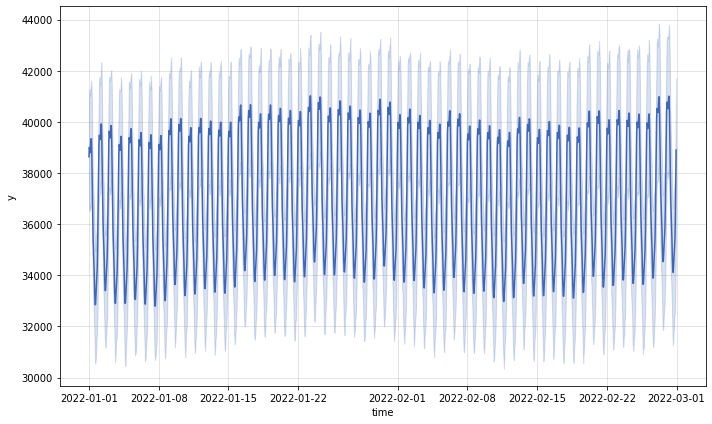

In [66]:
model.plot()

In [67]:
forecast.shape

(1416, 4)

In [68]:
forecast

,time,fcst,fcst_lower,fcst_upper
0,2022-01-01 00:00:00,38636.310352,36551.255868,40890.647499
1,2022-01-01 01:00:00,39006.793660,36773.976918,41261.779555
2,2022-01-01 02:00:00,38895.317731,36501.175624,41290.137882
3,2022-01-01 03:00:00,38792.660869,36604.283109,41025.376926
4,2022-01-01 04:00:00,38998.875001,36632.242643,41234.221296
...,...,...,...,...
1411,2022-02-28 19:00:00,35009.821864,32465.275654,37629.515566
1412,2022-02-28 20:00:00,35364.655694,32545.838071,38006.771280
1413,2022-02-28 21:00:00,36154.085921,33316.181452,38659.527322
1414,2022-02-28 22:00:00,37452.286441,34609.009924,40096.915829


In [69]:
ans_1=forecast['fcst']

In [70]:
ans_1

0       38636.310352
1       39006.793660
2       38895.317731
3       38792.660869
4       38998.875001
            ...     
1411    35009.821864
1412    35364.655694
1413    36154.085921
1414    37452.286441
1415    38902.033239
Name: fcst, Length: 1416, dtype: float64

In [72]:
ans_1.to_csv('ans_1.csv')

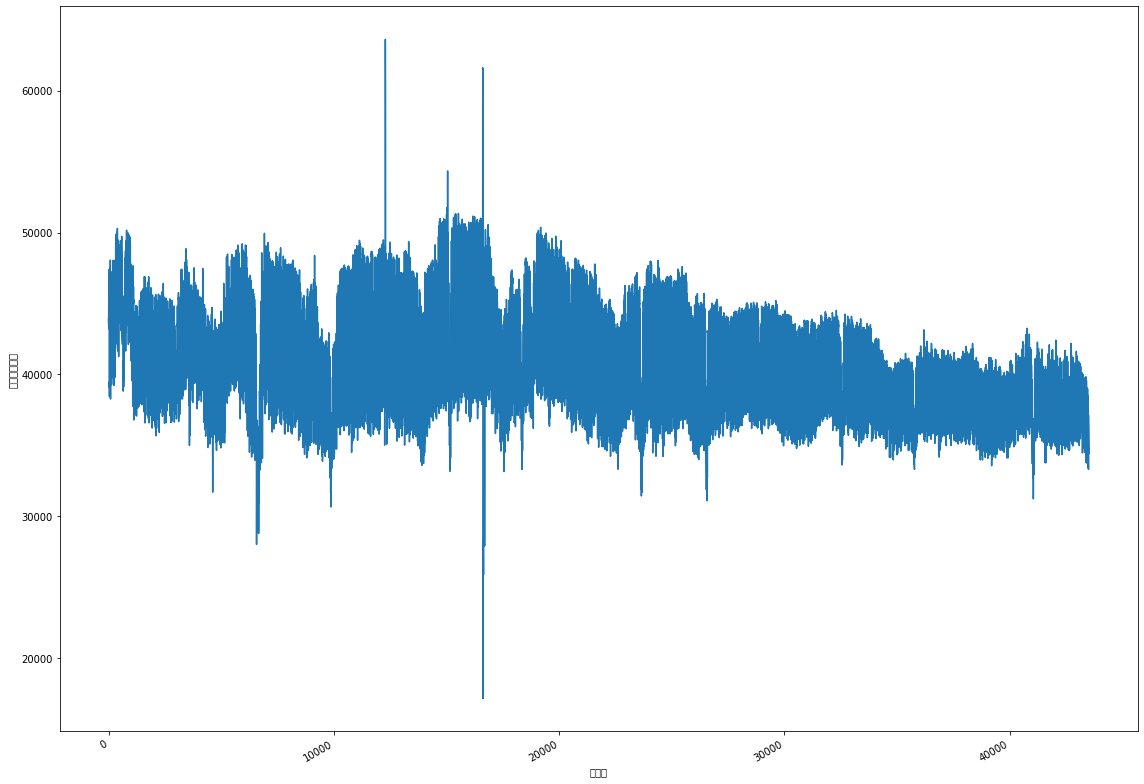

In [73]:
fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(df_total['총생활인구수'])
ax.set_xlabel('시간대')
ax.set_ylabel('총생활인구수')
fig.autofmt_xdate()
plt.tight_layout()

# 11~12

In [77]:
df_temp=df_total['총생활인구수'][42096:]
df_temp.shape

(1416,)

In [82]:
df_temp
df_temp=pd.DataFrame(df_temp)

In [83]:
df_temp.reset_index(inplace=True)

In [84]:
df_temp

,index,총생활인구수
0,42096,39873.2794
1,42097,39797.9224
2,42098,39671.0867
3,42099,39720.9665
4,42100,39897.9873
...,...,...
1411,43507,33304.5400
1412,43508,33368.7201
1413,43509,34083.1721
1414,43510,34380.0806


In [87]:
df_temp=df_temp['총생활인구수']

In [88]:
df_temp

0       39873.2794
1       39797.9224
2       39671.0867
3       39720.9665
4       39897.9873
           ...    
1411    33304.5400
1412    33368.7201
1413    34083.1721
1414    34380.0806
1415    37074.2785
Name: 총생활인구수, Length: 1416, dtype: float64

In [89]:
df_temp.to_csv('ans_2_1.csv')

# KATS 2

In [90]:
df_s = TimeSeriesData(time=df_total['시간대'], value=df_total['총생활인구수'])


# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative',holidays_prior_scale=3,seasonality_prior_scale=24)
# create a prophet model instance
model = ProphetModel(df_s, params)
# fit model simply by calling m.fit()
model.fit()
# make prediction for next 30 month
forecast = model.predict(steps=2, freq="H")
forecast.head()

,time,fcst,fcst_lower,fcst_upper
0,2022-01-01 00:00:00,38664.472225,36529.018764,40823.345100
1,2022-01-01 01:00:00,39035.288267,36771.185169,41319.589564


In [91]:
forecast = model.predict(steps=1416, freq="H")
forecast.head()

,time,fcst,fcst_lower,fcst_upper
0,2022-01-01 00:00:00,38664.472225,36488.576883,40761.058224
1,2022-01-01 01:00:00,39035.288267,36839.402698,41420.869543
2,2022-01-01 02:00:00,38923.812137,36562.991147,41106.277184
3,2022-01-01 03:00:00,38821.154122,36433.102695,41073.069138
4,2022-01-01 04:00:00,39027.574215,36807.610554,41077.395038


In [92]:
ProphetParams()

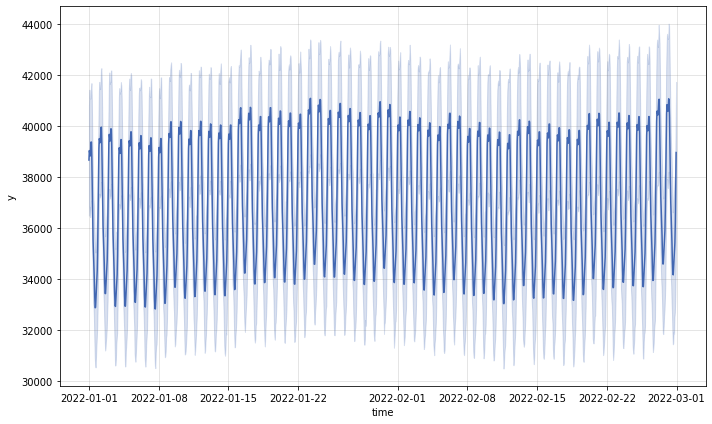

In [93]:
model.plot()

In [94]:
forecast.shape

(1416, 4)

In [95]:
forecast

,time,fcst,fcst_lower,fcst_upper
0,2022-01-01 00:00:00,38664.472225,36488.576883,40761.058224
1,2022-01-01 01:00:00,39035.288267,36839.402698,41420.869543
2,2022-01-01 02:00:00,38923.812137,36562.991147,41106.277184
3,2022-01-01 03:00:00,38821.154122,36433.102695,41073.069138
4,2022-01-01 04:00:00,39027.574215,36807.610554,41077.395038
...,...,...,...,...
1411,2022-02-28 19:00:00,35063.379768,32518.548865,37966.150179
1412,2022-02-28 20:00:00,35418.477851,32707.119783,37964.077660
1413,2022-02-28 21:00:00,36208.562037,33368.163622,38890.160827
1414,2022-02-28 22:00:00,37507.868078,34556.981669,40343.676571


In [96]:
ans_3=forecast['fcst_lower']

In [ ]:
ans_3

0       38636.310352
1       39006.793660
2       38895.317731
3       38792.660869
4       38998.875001
            ...     
1411    35009.821864
1412    35364.655694
1413    36154.085921
1414    37452.286441
1415    38902.033239
Name: fcst, Length: 1416, dtype: float64

In [97]:
ans_3.to_csv('ans_3.csv')

In [98]:
ans_4=forecast['fcst']

In [99]:
ans_4.to_csv('ans_4.csv')

# 사인 코사인 캣부

In [277]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np



def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))
  
def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [278]:
df_total.head()

40680    39873.2794
40681    39797.9224
40682    39671.0867
40683    39720.9665
40684    39897.9873
Name: 총생활인구수, dtype: float64

In [279]:
df_test=df_total[:1416]
df_test

40680    39873.2794
40681    39797.9224
40682    39671.0867
40683    39720.9665
40684    39897.9873
            ...    
42091    33304.5400
42092    33368.7201
42093    34083.1721
42094    34380.0806
42095    37074.2785
Name: 총생활인구수, Length: 1416, dtype: float64

In [280]:
df_test['년']=2022

In [281]:
df_test


40680    39873.2794
40681    39797.9224
40682    39671.0867
40683    39720.9665
40684    39897.9873
            ...    
42092    33368.7201
42093    34083.1721
42094    34380.0806
42095    37074.2785
년         2022.0000
Name: 총생활인구수, Length: 1417, dtype: float64

In [ ]:
# 아래에 실습코드를 작성하세요.
# df_test["hour_sin"] = sin_transformer(24).fit_transform(df_total[["시간대구분"]])
# df_test["hour_cos"] = cos_transformer(24).fit_transform(df_total[["시간대구분"]])




# df_test["week_sin"] = sin_transformer(7).fit_transform(df_total[["요일"]])
# df_test["week_cos"] = cos_transformer(7).fit_transform(df_total[["요일"]])




# df_test["day_sin"] = sin_transformer(30).fit_transform(df_total[["일"]])
# df_test["day_cos"] = cos_transformer(30).fit_transform(df_total[["일"]])



# df_test["month_sin"] = sin_transformer(12).fit_transform(df_total[["월"]])
# df_test["month_cos"] = cos_transformer(12).fit_transform(df_total[["월"]])



# df_test.drop(columns={'시간','요일','일','월'},inplace=True)



# # 아래에 실습코드를 작성하세요.
# df_test["hour_sin"] = sin_transformer(24).fit_transform(df_total[["시간"]])
# df_test["hour_cos"] = cos_transformer(24).fit_transform(df_total[["시간"]])




# df_test["week_sin"] = sin_transformer(7).fit_transform(df_total[["요일"]])
# df_test["week_cos"] = cos_transformer(7).fit_transform(df_total[["요일"]])




# df_test["day_sin"] = sin_transformer(30).fit_transform(df_total[["일"]])
# df_test["day_cos"] = cos_transformer(30).fit_transform(df_total[["일"]])



# df_test["month_sin"] = sin_transformer(12).fit_transform(df_total[["월"]])
# df_test["month_cos"] = cos_transformer(12).fit_transform(df_total[["월"]])



# df_test.drop(columns={'시간','요일','일','월'},inplace=True)

In [283]:
df_test

40680    39873.2794
40681    39797.9224
40682    39671.0867
40683    39720.9665
40684    39897.9873
            ...    
42092    33368.7201
42093    34083.1721
42094    34380.0806
42095    37074.2785
년         2022.0000
Name: 총생활인구수, Length: 1417, dtype: float64

In [284]:
df_total.head()

40680    39873.2794
40681    39797.9224
40682    39671.0867
40683    39720.9665
40684    39897.9873
Name: 총생활인구수, dtype: float64

In [ ]:
df_test.head()

In [ ]:
df_total.info()

In [ ]:
df_test=df_test[['년',	'월',	'일', '시간대구분']]

In [ ]:
df_test.info()

In [ ]:
df_test = df_test.astype({'년':'str'})

In [ ]:
df_test['시간대']=df_test['년']+'-'+df_test['월']+'-'+df_test['일']

In [ ]:
df_total

In [ ]:
df_total=df_total[['년',	'월',	'일', '시간대구분',	'총생활인구수']]
df_total

In [ ]:
df_total = df_total.astype({'년':'str'})

In [ ]:
df_total['시간대']=df_total['년']+'-'+df_total['월']+'-'+df_total['일']

In [ ]:
df_test

In [ ]:
df_total

In [ ]:
df_total.info()

In [ ]:
df_total = df_total.astype({'시간대구분':'str'})

In [ ]:
for i in range(len(df_total['시간대구분'])):
  df_total['시간대구분'][i]=df_total['시간대구분'][i].zfill(2)

In [ ]:
df_total.info()

In [ ]:
df_total

In [ ]:
df_test

## 코로나 휴일 변수 추가

* 휴일 주말 + 공휴일

In [ ]:
df_total=df_total[['년',	'월',	'일',	'시간대구분',	'총생활인구수']]
df_total

In [ ]:
df_total['시간대']=df_total['년']+'-'+df_total['월']+'-'+df_total['월']+' '+df_total['시간대구분']
df_total

In [ ]:
# 주말
df_total['최종시간'] = pd.to_datetime(df_total['시간대'], format='%Y-%m-%d %H', errors='raise')

In [ ]:
df_total.info()

In [ ]:
df_total

In [ ]:
df_test['시간대']=df_test['년']+'-'+df_test['월']+'-'+df_test['월']+' '+df_test['시간대구분']
df_test['최종시간'] = pd.to_datetime(df_test['시간대'], format='%Y-%m-%d %H', errors='raise')
df_test

In [ ]:
df_test.info()

In [ ]:
df_total['요일'] = df_total['최종시간'].dt.weekday
df_test['요일'] = df_test['최종시간'].dt.weekday

In [ ]:
df_test

In [ ]:
df_test['요일'].value_counts()

In [ ]:
df_total['요일'].value_counts()

In [ ]:
df_total.head(50)

In [285]:
df_total=pd.concat([df_17,df_18,df_19,df_20,df_21])

In [286]:
df_total=df_total[['기준일ID',	'시간대구분',	'총생활인구수']]
df_total

,기준일ID,시간대구분,총생활인구수
0,20170101,0,43922.2281
1,20170101,1,43763.4929
2,20170101,2,43561.5708
3,20170101,3,43928.9929
4,20170101,4,44150.2973
...,...,...,...
8755,20211231,19,33304.5400
8756,20211231,20,33368.7201
8757,20211231,21,34083.1721
8758,20211231,22,34380.0806


In [287]:
df_total['기준일ID'] = df_total['기준일ID'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
df_total

,기준일ID,시간대구분,총생활인구수
0,2017-01-01,0,43922.2281
1,2017-01-01,1,43763.4929
2,2017-01-01,2,43561.5708
3,2017-01-01,3,43928.9929
4,2017-01-01,4,44150.2973
...,...,...,...
8755,2021-12-31,19,33304.5400
8756,2021-12-31,20,33368.7201
8757,2021-12-31,21,34083.1721
8758,2021-12-31,22,34380.0806


In [288]:
df_total['년'] = df_total['기준일ID'].dt.year
df_total['월'] = df_total['기준일ID'].dt.month
df_total['일'] = df_total['기준일ID'].dt.day
df_total['요일'] = df_total['기준일ID'].dt.weekday
df_total

,기준일ID,시간대구분,총생활인구수,년,월,일,요일
0,2017-01-01,0,43922.2281,2017,1,1,6
1,2017-01-01,1,43763.4929,2017,1,1,6
2,2017-01-01,2,43561.5708,2017,1,1,6
3,2017-01-01,3,43928.9929,2017,1,1,6
4,2017-01-01,4,44150.2973,2017,1,1,6
...,...,...,...,...,...,...,...
8755,2021-12-31,19,33304.5400,2021,12,31,4
8756,2021-12-31,20,33368.7201,2021,12,31,4
8757,2021-12-31,21,34083.1721,2021,12,31,4
8758,2021-12-31,22,34380.0806,2021,12,31,4


In [289]:
df_total['요일'].value_counts()

0    6240
6    6216
1    6216
2    6216
3    6216
4    6216
5    6192
Name: 요일, dtype: int64

In [290]:
df_test=df_total[:1416]
df_test

,기준일ID,시간대구분,총생활인구수,년,월,일,요일
0,2017-01-01,0,43922.2281,2017,1,1,6
1,2017-01-01,1,43763.4929,2017,1,1,6
2,2017-01-01,2,43561.5708,2017,1,1,6
3,2017-01-01,3,43928.9929,2017,1,1,6
4,2017-01-01,4,44150.2973,2017,1,1,6
...,...,...,...,...,...,...,...
1411,2017-02-28,19,38909.9049,2017,2,28,1
1412,2017-02-28,20,39470.9081,2017,2,28,1
1413,2017-02-28,21,40198.1886,2017,2,28,1
1414,2017-02-28,22,40692.1451,2017,2,28,1


In [291]:
df_test=df_test[['시간대구분',		'년',	'월',	'일']]
df_test

,시간대구분,년,월,일
0,0,2017,1,1
1,1,2017,1,1
2,2,2017,1,1
3,3,2017,1,1
4,4,2017,1,1
...,...,...,...,...
1411,19,2017,2,28
1412,20,2017,2,28
1413,21,2017,2,28
1414,22,2017,2,28


In [292]:
df_test['년']=2022

In [293]:
df_test

,시간대구분,년,월,일
0,0,2022,1,1
1,1,2022,1,1
2,2,2022,1,1
3,3,2022,1,1
4,4,2022,1,1
...,...,...,...,...
1411,19,2022,2,28
1412,20,2022,2,28
1413,21,2022,2,28
1414,22,2022,2,28


In [294]:
df_test = df_test.astype({'년':'str'})
df_test = df_test.astype({'월':'str'})
df_test = df_test.astype({'일':'str'})



In [295]:
for i in range(len(df_test['월'])):
  df_test['월'][i]=df_test['월'][i].zfill(2)
for i in range(len(df_test['일'])):
  df_test['일'][i]=df_test['일'][i].zfill(2)

In [296]:
df_test

,시간대구분,년,월,일
0,0,2022,01,01
1,1,2022,01,01
2,2,2022,01,01
3,3,2022,01,01
4,4,2022,01,01
...,...,...,...,...
1411,19,2022,02,28
1412,20,2022,02,28
1413,21,2022,02,28
1414,22,2022,02,28


In [297]:
df_total = df_total.astype({'년':'str'})
df_total = df_total.astype({'월':'str'})
df_total = df_total.astype({'일':'str'})

In [298]:
df_total = df_total.astype({'시간대구분':'str'})
df_test = df_test.astype({'시간대구분':'str'})

In [299]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  object        
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 2.7+ MB


In [300]:
for i in range(len(df_test['시간대구분'])):
  df_test['시간대구분'][i]=df_test['시간대구분'][i].zfill(2)




In [301]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  object        
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 2.7+ MB


In [302]:
df_test['기준일ID']=df_test['년']+'-'+df_test['월']+'-'+df_test['일']

In [303]:
df_test

,시간대구분,년,월,일,기준일ID
0,00,2022,01,01,2022-01-01
1,01,2022,01,01,2022-01-01
2,02,2022,01,01,2022-01-01
3,03,2022,01,01,2022-01-01
4,04,2022,01,01,2022-01-01
...,...,...,...,...,...
1411,19,2022,02,28,2022-02-28
1412,20,2022,02,28,2022-02-28
1413,21,2022,02,28,2022-02-28
1414,22,2022,02,28,2022-02-28


In [304]:
df_test['기준일ID'] = df_test['기준일ID'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [305]:
df_test

,시간대구분,년,월,일,기준일ID
0,00,2022,01,01,2022-01-01
1,01,2022,01,01,2022-01-01
2,02,2022,01,01,2022-01-01
3,03,2022,01,01,2022-01-01
4,04,2022,01,01,2022-01-01
...,...,...,...,...,...
1411,19,2022,02,28,2022-02-28
1412,20,2022,02,28,2022-02-28
1413,21,2022,02,28,2022-02-28
1414,22,2022,02,28,2022-02-28


In [306]:
df_total

,기준일ID,시간대구분,총생활인구수,년,월,일,요일
0,2017-01-01,0,43922.2281,2017,1,1,6
1,2017-01-01,1,43763.4929,2017,1,1,6
2,2017-01-01,2,43561.5708,2017,1,1,6
3,2017-01-01,3,43928.9929,2017,1,1,6
4,2017-01-01,4,44150.2973,2017,1,1,6
...,...,...,...,...,...,...,...
8755,2021-12-31,19,33304.5400,2021,12,31,4
8756,2021-12-31,20,33368.7201,2021,12,31,4
8757,2021-12-31,21,34083.1721,2021,12,31,4
8758,2021-12-31,22,34380.0806,2021,12,31,4


In [307]:
df_test['요일'] = df_test['기준일ID'].dt.weekday

In [308]:
df_total.head()

,기준일ID,시간대구분,총생활인구수,년,월,일,요일
0,2017-01-01,0,43922.2281,2017,1,1,6
1,2017-01-01,1,43763.4929,2017,1,1,6
2,2017-01-01,2,43561.5708,2017,1,1,6
3,2017-01-01,3,43928.9929,2017,1,1,6
4,2017-01-01,4,44150.2973,2017,1,1,6


In [309]:
df_test.head()

,시간대구분,년,월,일,기준일ID,요일
0,00,2022,01,01,2022-01-01,5
1,01,2022,01,01,2022-01-01,5
2,02,2022,01,01,2022-01-01,5
3,03,2022,01,01,2022-01-01,5
4,04,2022,01,01,2022-01-01,5


In [310]:
df_test['요일'].value_counts()

5    216
6    216
0    216
1    192
2    192
3    192
4    192
Name: 요일, dtype: int64

In [311]:
df_total.head()

,기준일ID,시간대구분,총생활인구수,년,월,일,요일
0,2017-01-01,0,43922.2281,2017,1,1,6
1,2017-01-01,1,43763.4929,2017,1,1,6
2,2017-01-01,2,43561.5708,2017,1,1,6
3,2017-01-01,3,43928.9929,2017,1,1,6
4,2017-01-01,4,44150.2973,2017,1,1,6


* 요일 5,6 이면 주말

In [312]:
df_total['주말']=0

In [313]:
import numpy as np

In [314]:
df_total['주말']=np.where((df_total['요일']==5)|(df_total['요일']==6),1,0)

In [315]:
df_total['요일'].value_counts()

0    6240
6    6216
1    6216
2    6216
3    6216
4    6216
5    6192
Name: 요일, dtype: int64

In [316]:
df_total['주말'].value_counts()

0    31104
1    12408
Name: 주말, dtype: int64

In [317]:
df_test['주말']=np.where((df_test['요일']==5)|(df_test['요일']==6),1,0)

In [318]:
df_total = df_total.astype({'년':'int'})
df_test = df_test.astype({'년':'int'})

In [319]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  int64         
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
 7   주말      43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 3.0+ MB


In [320]:
df_total['코로나여부']=np.where(df_total['년']>2019,1,0)
df_test['코로나여부']=np.where(df_test['년']>2019,1,0)

In [321]:
df_total

,기준일ID,시간대구분,총생활인구수,년,월,일,요일,주말,코로나여부
0,2017-01-01,0,43922.2281,2017,1,1,6,1,0
1,2017-01-01,1,43763.4929,2017,1,1,6,1,0
2,2017-01-01,2,43561.5708,2017,1,1,6,1,0
3,2017-01-01,3,43928.9929,2017,1,1,6,1,0
4,2017-01-01,4,44150.2973,2017,1,1,6,1,0
...,...,...,...,...,...,...,...,...,...
8755,2021-12-31,19,33304.5400,2021,12,31,4,0,1
8756,2021-12-31,20,33368.7201,2021,12,31,4,0,1
8757,2021-12-31,21,34083.1721,2021,12,31,4,0,1
8758,2021-12-31,22,34380.0806,2021,12,31,4,0,1


In [322]:
df_test

,시간대구분,년,월,일,기준일ID,요일,주말,코로나여부
0,00,2022,01,01,2022-01-01,5,1,1
1,01,2022,01,01,2022-01-01,5,1,1
2,02,2022,01,01,2022-01-01,5,1,1
3,03,2022,01,01,2022-01-01,5,1,1
4,04,2022,01,01,2022-01-01,5,1,1
...,...,...,...,...,...,...,...,...
1411,19,2022,02,28,2022-02-28,0,0,1
1412,20,2022,02,28,2022-02-28,0,0,1
1413,21,2022,02,28,2022-02-28,0,0,1
1414,22,2022,02,28,2022-02-28,0,0,1


In [323]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  int64         
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
 7   주말      43512 non-null  int64         
 8   코로나여부   43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [324]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1415
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대구분   1416 non-null   object        
 1   년       1416 non-null   int64         
 2   월       1416 non-null   object        
 3   일       1416 non-null   object        
 4   기준일ID   1416 non-null   datetime64[ns]
 5   요일      1416 non-null   int64         
 6   주말      1416 non-null   int64         
 7   코로나여부   1416 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 131.9+ KB


In [325]:
df_total = df_total.astype({'년':'str'})

In [326]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  object        
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
 7   주말      43512 non-null  int64         
 8   코로나여부   43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [327]:
df_test = df_test.astype({'년':'str'})

In [328]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1415
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대구분   1416 non-null   object        
 1   년       1416 non-null   object        
 2   월       1416 non-null   object        
 3   일       1416 non-null   object        
 4   기준일ID   1416 non-null   datetime64[ns]
 5   요일      1416 non-null   int64         
 6   주말      1416 non-null   int64         
 7   코로나여부   1416 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 131.9+ KB


In [329]:
for i in range(len(df_test['월'])):
  df_test['월'][i]=df_test['월'][i].zfill(2)
for i in range(len(df_test['일'])):
  df_test['일'][i]=df_test['일'][i].zfill(2)

In [330]:
df_test

,시간대구분,년,월,일,기준일ID,요일,주말,코로나여부
0,00,2022,01,01,2022-01-01,5,1,1
1,01,2022,01,01,2022-01-01,5,1,1
2,02,2022,01,01,2022-01-01,5,1,1
3,03,2022,01,01,2022-01-01,5,1,1
4,04,2022,01,01,2022-01-01,5,1,1
...,...,...,...,...,...,...,...,...
1411,19,2022,02,28,2022-02-28,0,0,1
1412,20,2022,02,28,2022-02-28,0,0,1
1413,21,2022,02,28,2022-02-28,0,0,1
1414,22,2022,02,28,2022-02-28,0,0,1


In [331]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  object        
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
 7   주말      43512 non-null  int64         
 8   코로나여부   43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [332]:
df_total = df_total.astype({'일':'str'})

In [333]:
df_total.isna().sum()

기준일ID     0
시간대구분     0
총생활인구수    0
년         0
월         0
일         0
요일        0
주말        0
코로나여부     0
dtype: int64

In [334]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1415
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대구분   1416 non-null   object        
 1   년       1416 non-null   object        
 2   월       1416 non-null   object        
 3   일       1416 non-null   object        
 4   기준일ID   1416 non-null   datetime64[ns]
 5   요일      1416 non-null   int64         
 6   주말      1416 non-null   int64         
 7   코로나여부   1416 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 131.9+ KB


In [335]:
df_test

,시간대구분,년,월,일,기준일ID,요일,주말,코로나여부
0,00,2022,01,01,2022-01-01,5,1,1
1,01,2022,01,01,2022-01-01,5,1,1
2,02,2022,01,01,2022-01-01,5,1,1
3,03,2022,01,01,2022-01-01,5,1,1
4,04,2022,01,01,2022-01-01,5,1,1
...,...,...,...,...,...,...,...,...
1411,19,2022,02,28,2022-02-28,0,0,1
1412,20,2022,02,28,2022-02-28,0,0,1
1413,21,2022,02,28,2022-02-28,0,0,1
1414,22,2022,02,28,2022-02-28,0,0,1


In [336]:
df_total

,기준일ID,시간대구분,총생활인구수,년,월,일,요일,주말,코로나여부
0,2017-01-01,0,43922.2281,2017,1,1,6,1,0
1,2017-01-01,1,43763.4929,2017,1,1,6,1,0
2,2017-01-01,2,43561.5708,2017,1,1,6,1,0
3,2017-01-01,3,43928.9929,2017,1,1,6,1,0
4,2017-01-01,4,44150.2973,2017,1,1,6,1,0
...,...,...,...,...,...,...,...,...,...
8755,2021-12-31,19,33304.5400,2021,12,31,4,0,1
8756,2021-12-31,20,33368.7201,2021,12,31,4,0,1
8757,2021-12-31,21,34083.1721,2021,12,31,4,0,1
8758,2021-12-31,22,34380.0806,2021,12,31,4,0,1


In [337]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  object        
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
 7   주말      43512 non-null  int64         
 8   코로나여부   43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [338]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1415
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대구분   1416 non-null   object        
 1   년       1416 non-null   object        
 2   월       1416 non-null   object        
 3   일       1416 non-null   object        
 4   기준일ID   1416 non-null   datetime64[ns]
 5   요일      1416 non-null   int64         
 6   주말      1416 non-null   int64         
 7   코로나여부   1416 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 131.9+ KB


In [339]:
df_total = df_total.astype({'년':'str'})

In [340]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  object        
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
 7   주말      43512 non-null  int64         
 8   코로나여부   43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [341]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np



def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))
  
def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))





In [342]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1415
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대구분   1416 non-null   object        
 1   년       1416 non-null   object        
 2   월       1416 non-null   object        
 3   일       1416 non-null   object        
 4   기준일ID   1416 non-null   datetime64[ns]
 5   요일      1416 non-null   int64         
 6   주말      1416 non-null   int64         
 7   코로나여부   1416 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 131.9+ KB


In [343]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  object        
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
 7   주말      43512 non-null  int64         
 8   코로나여부   43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [344]:

df_total = df_total.astype({'시간대구분':'int'})
df_total = df_total.astype({'년':'int'})
df_total = df_total.astype({'월':'int'})
df_total = df_total.astype({'일':'int'})
df_total = df_total.astype({'요일':'int'})

df_test = df_test.astype({'시간대구분':'int'})
df_test = df_test.astype({'년':'int'})
df_test = df_test.astype({'월':'int'})
df_test = df_test.astype({'일':'int'})
df_test = df_test.astype({'요일':'int'})

In [345]:
# 아래에 실습코드를 작성하세요.
df_total["hour_sin"] = sin_transformer(24).fit_transform(df_total[["시간대구분"]])
df_total["hour_cos"] = cos_transformer(24).fit_transform(df_total[["시간대구분"]])




df_total["week_sin"] = sin_transformer(7).fit_transform(df_total[["요일"]])
df_total["week_cos"] = cos_transformer(7).fit_transform(df_total[["요일"]])




df_total["day_sin"] = sin_transformer(30).fit_transform(df_total[["일"]])
df_total["day_cos"] = cos_transformer(30).fit_transform(df_total[["일"]])



df_total["month_sin"] = sin_transformer(12).fit_transform(df_total[["월"]])
df_total["month_cos"] = cos_transformer(12).fit_transform(df_total[["월"]])



df_total.drop(columns={'시간대구분','요일','일','월'},inplace=True)



# 아래에 실습코드를 작성하세요.
df_test["hour_sin"] = sin_transformer(24).fit_transform(df_test[["시간대구분"]])
df_test["hour_cos"] = cos_transformer(24).fit_transform(df_test[["시간대구분"]])




df_test["week_sin"] = sin_transformer(7).fit_transform(df_test[["요일"]])
df_test["week_cos"] = cos_transformer(7).fit_transform(df_test[["요일"]])




df_test["day_sin"] = sin_transformer(30).fit_transform(df_test[["일"]])
df_test["day_cos"] = cos_transformer(30).fit_transform(df_test[["일"]])



df_test["month_sin"] = sin_transformer(12).fit_transform(df_test[["월"]])
df_test["month_cos"] = cos_transformer(12).fit_transform(df_test[["월"]])



df_test.drop(columns={'시간대구분','요일','일','월'},inplace=True)

In [346]:
df_total

,기준일ID,총생활인구수,년,주말,코로나여부,hour_sin,hour_cos,week_sin,week_cos,day_sin,day_cos,month_sin,month_cos
0,2017-01-01,43922.2281,2017,1,0,0.000000,1.000000,-0.781831,0.623490,0.207912,0.978148,5.000000e-01,0.866025
1,2017-01-01,43763.4929,2017,1,0,0.258819,0.965926,-0.781831,0.623490,0.207912,0.978148,5.000000e-01,0.866025
2,2017-01-01,43561.5708,2017,1,0,0.500000,0.866025,-0.781831,0.623490,0.207912,0.978148,5.000000e-01,0.866025
3,2017-01-01,43928.9929,2017,1,0,0.707107,0.707107,-0.781831,0.623490,0.207912,0.978148,5.000000e-01,0.866025
4,2017-01-01,44150.2973,2017,1,0,0.866025,0.500000,-0.781831,0.623490,0.207912,0.978148,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021-12-31,33304.5400,2021,0,1,-0.965926,0.258819,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000
8756,2021-12-31,33368.7201,2021,0,1,-0.866025,0.500000,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000
8757,2021-12-31,34083.1721,2021,0,1,-0.707107,0.707107,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000
8758,2021-12-31,34380.0806,2021,0,1,-0.500000,0.866025,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000


In [347]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   기준일ID      43512 non-null  datetime64[ns]
 1   총생활인구수     43512 non-null  float64       
 2   년          43512 non-null  int64         
 3   주말         43512 non-null  int64         
 4   코로나여부      43512 non-null  int64         
 5   hour_sin   43512 non-null  float64       
 6   hour_cos   43512 non-null  float64       
 7   week_sin   43512 non-null  float64       
 8   week_cos   43512 non-null  float64       
 9   day_sin    43512 non-null  float64       
 10  day_cos    43512 non-null  float64       
 11  month_sin  43512 non-null  float64       
 12  month_cos  43512 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 4.6 MB


In [348]:
df_test

,년,기준일ID,주말,코로나여부,hour_sin,hour_cos,week_sin,week_cos,day_sin,day_cos,month_sin,month_cos
0,2022,2022-01-01,1,1,0.000000,1.000000,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025
1,2022,2022-01-01,1,1,0.258819,0.965926,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025
2,2022,2022-01-01,1,1,0.500000,0.866025,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025
3,2022,2022-01-01,1,1,0.707107,0.707107,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025
4,2022,2022-01-01,1,1,0.866025,0.500000,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...
1411,2022,2022-02-28,0,1,-0.965926,0.258819,0.000000,1.000000,-0.406737,0.913545,0.866025,0.500000
1412,2022,2022-02-28,0,1,-0.866025,0.500000,0.000000,1.000000,-0.406737,0.913545,0.866025,0.500000
1413,2022,2022-02-28,0,1,-0.707107,0.707107,0.000000,1.000000,-0.406737,0.913545,0.866025,0.500000
1414,2022,2022-02-28,0,1,-0.500000,0.866025,0.000000,1.000000,-0.406737,0.913545,0.866025,0.500000


In [349]:
df_test.drop(columns={'기준일ID','년'},inplace=True)
df_total.drop(columns={'기준일ID','년'},inplace=True)

In [350]:
df_total.head()

,총생활인구수,주말,코로나여부,hour_sin,hour_cos,week_sin,week_cos,day_sin,day_cos,month_sin,month_cos
0,43922.2281,1,0,0.000000,1.000000,-0.781831,0.62349,0.207912,0.978148,0.5,0.866025
1,43763.4929,1,0,0.258819,0.965926,-0.781831,0.62349,0.207912,0.978148,0.5,0.866025
2,43561.5708,1,0,0.500000,0.866025,-0.781831,0.62349,0.207912,0.978148,0.5,0.866025
3,43928.9929,1,0,0.707107,0.707107,-0.781831,0.62349,0.207912,0.978148,0.5,0.866025
4,44150.2973,1,0,0.866025,0.500000,-0.781831,0.62349,0.207912,0.978148,0.5,0.866025


In [351]:
df_test.head()

,주말,코로나여부,hour_sin,hour_cos,week_sin,week_cos,day_sin,day_cos,month_sin,month_cos
0,1,1,0.000000,1.000000,-0.974928,-0.222521,0.207912,0.978148,0.5,0.866025
1,1,1,0.258819,0.965926,-0.974928,-0.222521,0.207912,0.978148,0.5,0.866025
2,1,1,0.500000,0.866025,-0.974928,-0.222521,0.207912,0.978148,0.5,0.866025
3,1,1,0.707107,0.707107,-0.974928,-0.222521,0.207912,0.978148,0.5,0.866025
4,1,1,0.866025,0.500000,-0.974928,-0.222521,0.207912,0.978148,0.5,0.866025


In [352]:
df_total['2달전인구']=df_total['총생활인구수'].shift(1416)


In [353]:
df_total

,총생활인구수,주말,코로나여부,hour_sin,hour_cos,week_sin,week_cos,day_sin,day_cos,month_sin,month_cos,2달전인구
0,43922.2281,1,0,0.000000,1.000000,-0.781831,0.623490,0.207912,0.978148,5.000000e-01,0.866025,NaN
1,43763.4929,1,0,0.258819,0.965926,-0.781831,0.623490,0.207912,0.978148,5.000000e-01,0.866025,NaN
2,43561.5708,1,0,0.500000,0.866025,-0.781831,0.623490,0.207912,0.978148,5.000000e-01,0.866025,NaN
3,43928.9929,1,0,0.707107,0.707107,-0.781831,0.623490,0.207912,0.978148,5.000000e-01,0.866025,NaN
4,44150.2973,1,0,0.866025,0.500000,-0.781831,0.623490,0.207912,0.978148,5.000000e-01,0.866025,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,33304.5400,0,1,-0.965926,0.258819,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000,35708.4819
8756,33368.7201,0,1,-0.866025,0.500000,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000,35924.7026
8757,34083.1721,0,1,-0.707107,0.707107,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000,36597.7205
8758,34380.0806,0,1,-0.500000,0.866025,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000,37163.4665


In [354]:
df_total.dropna(axis=0, inplace=True)

In [355]:
df_total

,총생활인구수,주말,코로나여부,hour_sin,hour_cos,week_sin,week_cos,day_sin,day_cos,month_sin,month_cos,2달전인구
1416,42753.6551,0,0,0.000000,1.000000,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43922.2281
1417,42903.9443,0,0,0.258819,0.965926,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43763.4929
1418,43253.2915,0,0,0.500000,0.866025,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43561.5708
1419,43554.8642,0,0,0.707107,0.707107,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43928.9929
1420,44111.1352,0,0,0.866025,0.500000,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,44150.2973
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,33304.5400,0,1,-0.965926,0.258819,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,35708.4819
8756,33368.7201,0,1,-0.866025,0.500000,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,35924.7026
8757,34083.1721,0,1,-0.707107,0.707107,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,36597.7205
8758,34380.0806,0,1,-0.500000,0.866025,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,37163.4665


In [356]:
df_total.reset_index(inplace=True)

In [357]:
df_total

,index,총생활인구수,주말,코로나여부,hour_sin,hour_cos,week_sin,week_cos,day_sin,day_cos,month_sin,month_cos,2달전인구
0,1416,42753.6551,0,0,0.000000,1.000000,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43922.2281
1,1417,42903.9443,0,0,0.258819,0.965926,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43763.4929
2,1418,43253.2915,0,0,0.500000,0.866025,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43561.5708
3,1419,43554.8642,0,0,0.707107,0.707107,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43928.9929
4,1420,44111.1352,0,0,0.866025,0.500000,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,44150.2973
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42091,8755,33304.5400,0,1,-0.965926,0.258819,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,35708.4819
42092,8756,33368.7201,0,1,-0.866025,0.500000,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,35924.7026
42093,8757,34083.1721,0,1,-0.707107,0.707107,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,36597.7205
42094,8758,34380.0806,0,1,-0.500000,0.866025,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,37163.4665


In [358]:
df_total.drop(columns={'index'},inplace=True)

In [359]:
df_total

,총생활인구수,주말,코로나여부,hour_sin,hour_cos,week_sin,week_cos,day_sin,day_cos,month_sin,month_cos,2달전인구
0,42753.6551,0,0,0.000000,1.000000,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43922.2281
1,42903.9443,0,0,0.258819,0.965926,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43763.4929
2,43253.2915,0,0,0.500000,0.866025,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43561.5708
3,43554.8642,0,0,0.707107,0.707107,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43928.9929
4,44111.1352,0,0,0.866025,0.500000,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,44150.2973
...,...,...,...,...,...,...,...,...,...,...,...,...
42091,33304.5400,0,1,-0.965926,0.258819,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,35708.4819
42092,33368.7201,0,1,-0.866025,0.500000,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,35924.7026
42093,34083.1721,0,1,-0.707107,0.707107,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,36597.7205
42094,34380.0806,0,1,-0.500000,0.866025,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,37163.4665


In [360]:
df_test

,주말,코로나여부,hour_sin,hour_cos,week_sin,week_cos,day_sin,day_cos,month_sin,month_cos
0,1,1,0.000000,1.000000,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025
1,1,1,0.258819,0.965926,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025
2,1,1,0.500000,0.866025,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025
3,1,1,0.707107,0.707107,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025
4,1,1,0.866025,0.500000,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...
1411,0,1,-0.965926,0.258819,0.000000,1.000000,-0.406737,0.913545,0.866025,0.500000
1412,0,1,-0.866025,0.500000,0.000000,1.000000,-0.406737,0.913545,0.866025,0.500000
1413,0,1,-0.707107,0.707107,0.000000,1.000000,-0.406737,0.913545,0.866025,0.500000
1414,0,1,-0.500000,0.866025,0.000000,1.000000,-0.406737,0.913545,0.866025,0.500000


In [362]:
df_temp=df_total['총생활인구수'][40680:]

In [365]:
import numpy as np

In [366]:
df_temp=np.array(df_temp)

In [367]:
df_test['2달전인구']=df_temp

In [368]:
df_test

,주말,코로나여부,hour_sin,hour_cos,week_sin,week_cos,day_sin,day_cos,month_sin,month_cos,2달전인구
0,1,1,0.000000,1.000000,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025,39873.2794
1,1,1,0.258819,0.965926,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025,39797.9224
2,1,1,0.500000,0.866025,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025,39671.0867
3,1,1,0.707107,0.707107,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025,39720.9665
4,1,1,0.866025,0.500000,-0.974928,-0.222521,0.207912,0.978148,0.500000,0.866025,39897.9873
...,...,...,...,...,...,...,...,...,...,...,...
1411,0,1,-0.965926,0.258819,0.000000,1.000000,-0.406737,0.913545,0.866025,0.500000,33304.5400
1412,0,1,-0.866025,0.500000,0.000000,1.000000,-0.406737,0.913545,0.866025,0.500000,33368.7201
1413,0,1,-0.707107,0.707107,0.000000,1.000000,-0.406737,0.913545,0.866025,0.500000,34083.1721
1414,0,1,-0.500000,0.866025,0.000000,1.000000,-0.406737,0.913545,0.866025,0.500000,34380.0806


In [369]:
df_test.isna().sum()

주말           0
코로나여부        0
hour_sin     0
hour_cos     0
week_sin     0
week_cos     0
day_sin      0
day_cos      0
month_sin    0
month_cos    0
2달전인구        0
dtype: int64

In [370]:
df_total

,총생활인구수,주말,코로나여부,hour_sin,hour_cos,week_sin,week_cos,day_sin,day_cos,month_sin,month_cos,2달전인구
0,42753.6551,0,0,0.000000,1.000000,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43922.2281
1,42903.9443,0,0,0.258819,0.965926,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43763.4929
2,43253.2915,0,0,0.500000,0.866025,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43561.5708
3,43554.8642,0,0,0.707107,0.707107,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,43928.9929
4,44111.1352,0,0,0.866025,0.500000,0.974928,-0.222521,0.207912,0.978148,1.000000e+00,6.123234e-17,44150.2973
...,...,...,...,...,...,...,...,...,...,...,...,...
42091,33304.5400,0,1,-0.965926,0.258819,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,35708.4819
42092,33368.7201,0,1,-0.866025,0.500000,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,35924.7026
42093,34083.1721,0,1,-0.707107,0.707107,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,36597.7205
42094,34380.0806,0,1,-0.500000,0.866025,-0.433884,-0.900969,0.207912,0.978148,-2.449294e-16,1.000000e+00,37163.4665


In [371]:
!pip install Catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.1 MB/s 


In [381]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor()

In [382]:
target = '총생활인구수'
x = df_total.drop(target, axis = 1)
y = df_total.loc[:, target]

In [383]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [386]:
x_train.shape,y_train.shape

((29467, 11), (29467,))

In [387]:
cat.fit(x_train,y_train)

Learning rate set to 0.069877
0:	learn: 3506.2579557	total: 13.8ms	remaining: 13.8s
1:	learn: 3347.7353687	total: 21.2ms	remaining: 10.6s
2:	learn: 3198.4871784	total: 30.1ms	remaining: 10s
3:	learn: 3064.4506375	total: 47ms	remaining: 11.7s
4:	learn: 2940.8476215	total: 76.7ms	remaining: 15.3s
5:	learn: 2828.3822271	total: 93.5ms	remaining: 15.5s
6:	learn: 2728.9254186	total: 112ms	remaining: 15.9s
7:	learn: 2638.1802160	total: 126ms	remaining: 15.6s
8:	learn: 2551.8487116	total: 144ms	remaining: 15.9s
9:	learn: 2476.3956228	total: 154ms	remaining: 15.2s
10:	learn: 2409.2781981	total: 166ms	remaining: 14.9s
11:	learn: 2349.4799733	total: 175ms	remaining: 14.4s
12:	learn: 2294.5865142	total: 182ms	remaining: 13.8s
13:	learn: 2247.1142192	total: 187ms	remaining: 13.2s
14:	learn: 2206.4604539	total: 193ms	remaining: 12.7s
15:	learn: 2168.1259578	total: 200ms	remaining: 12.3s
16:	learn: 2133.2730851	total: 212ms	remaining: 12.2s
17:	learn: 2095.5817246	total: 218ms	remaining: 11.9s
18:	le

In [388]:
pred = cat.predict(x_test)

In [389]:
pred.shape

(12629,)

In [390]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [391]:
print("r2 score :",r2_score(y_test,pred))
print("mse : ",mean_squared_error(y_test,pred))
print("rmse : ",mean_squared_error(y_test,pred, squared = False))

r2 score : 0.8961325865600002
mse :  1392358.7063908393
rmse :  1179.982502578254


In [378]:
df_5=pd.DataFrame(pred)

In [379]:
df_5.to_csv('ans_5.csv')

# 릿지

In [392]:
from sklearn.linear_model import Ridge

In [393]:
rdg=Ridge()

In [394]:
rdg.fit(x_train,y_train)

Ridge()

In [396]:
pred_rdg=rdg.predict(x_test)

In [397]:
pred_rdg.shape

(12629,)

In [398]:
print("r2 score :",r2_score(y_test,pred_rdg))
print("mse : ",mean_squared_error(y_test,pred_rdg))
print("rmse : ",mean_squared_error(y_test,pred_rdg, squared = False))

r2 score : 0.6545510331545394
mse :  4630796.711606244
rmse :  2151.928602813356


# 진짜 휴일 추가

In [400]:
!pip install pytimekr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytimekr: filename=pytimekr-0.1.0-py3-none-any.whl size=7941 sha256=e868b548b50400835eef95c8a1ad973e6eb90f88a84892b76627183d3cf91c2d
  Stored in directory: /root/.cache/pip/wheels/7c/54/31/d099bce210ce51c45eeb97e149699dedc66c78eb84c01be9c2
Successfully built pytimekr


In [401]:
from pytimekr import pytimekr

In [402]:
df_total=pd.concat([df_17,df_18,df_19,df_20,df_21])

In [403]:
df_total=df_total[['기준일ID',	'시간대구분',	'총생활인구수']]
df_total

,기준일ID,시간대구분,총생활인구수
0,20170101,0,43922.2281
1,20170101,1,43763.4929
2,20170101,2,43561.5708
3,20170101,3,43928.9929
4,20170101,4,44150.2973
...,...,...,...
8755,20211231,19,33304.5400
8756,20211231,20,33368.7201
8757,20211231,21,34083.1721
8758,20211231,22,34380.0806


In [404]:
df_total['기준일ID'] = df_total['기준일ID'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
df_total

,기준일ID,시간대구분,총생활인구수
0,2017-01-01,0,43922.2281
1,2017-01-01,1,43763.4929
2,2017-01-01,2,43561.5708
3,2017-01-01,3,43928.9929
4,2017-01-01,4,44150.2973
...,...,...,...
8755,2021-12-31,19,33304.5400
8756,2021-12-31,20,33368.7201
8757,2021-12-31,21,34083.1721
8758,2021-12-31,22,34380.0806


In [405]:
df_total['년'] = df_total['기준일ID'].dt.year
df_total['월'] = df_total['기준일ID'].dt.month
df_total['일'] = df_total['기준일ID'].dt.day
df_total['요일'] = df_total['기준일ID'].dt.weekday
df_total

,기준일ID,시간대구분,총생활인구수,년,월,일,요일
0,2017-01-01,0,43922.2281,2017,1,1,6
1,2017-01-01,1,43763.4929,2017,1,1,6
2,2017-01-01,2,43561.5708,2017,1,1,6
3,2017-01-01,3,43928.9929,2017,1,1,6
4,2017-01-01,4,44150.2973,2017,1,1,6
...,...,...,...,...,...,...,...
8755,2021-12-31,19,33304.5400,2021,12,31,4
8756,2021-12-31,20,33368.7201,2021,12,31,4
8757,2021-12-31,21,34083.1721,2021,12,31,4
8758,2021-12-31,22,34380.0806,2021,12,31,4


In [406]:
df_total['요일'].value_counts()

0    6240
6    6216
1    6216
2    6216
3    6216
4    6216
5    6192
Name: 요일, dtype: int64

In [407]:
df_test=df_total[:1416]
df_test

,기준일ID,시간대구분,총생활인구수,년,월,일,요일
0,2017-01-01,0,43922.2281,2017,1,1,6
1,2017-01-01,1,43763.4929,2017,1,1,6
2,2017-01-01,2,43561.5708,2017,1,1,6
3,2017-01-01,3,43928.9929,2017,1,1,6
4,2017-01-01,4,44150.2973,2017,1,1,6
...,...,...,...,...,...,...,...
1411,2017-02-28,19,38909.9049,2017,2,28,1
1412,2017-02-28,20,39470.9081,2017,2,28,1
1413,2017-02-28,21,40198.1886,2017,2,28,1
1414,2017-02-28,22,40692.1451,2017,2,28,1


In [408]:
df_test=df_test[['시간대구분',		'년',	'월',	'일']]
df_test

,시간대구분,년,월,일
0,0,2017,1,1
1,1,2017,1,1
2,2,2017,1,1
3,3,2017,1,1
4,4,2017,1,1
...,...,...,...,...
1411,19,2017,2,28
1412,20,2017,2,28
1413,21,2017,2,28
1414,22,2017,2,28


In [409]:
df_test['년']=2022

In [410]:
df_test

,시간대구분,년,월,일
0,0,2022,1,1
1,1,2022,1,1
2,2,2022,1,1
3,3,2022,1,1
4,4,2022,1,1
...,...,...,...,...
1411,19,2022,2,28
1412,20,2022,2,28
1413,21,2022,2,28
1414,22,2022,2,28


In [411]:
df_test = df_test.astype({'년':'str'})
df_test = df_test.astype({'월':'str'})
df_test = df_test.astype({'일':'str'})



In [412]:
for i in range(len(df_test['월'])):
  df_test['월'][i]=df_test['월'][i].zfill(2)
for i in range(len(df_test['일'])):
  df_test['일'][i]=df_test['일'][i].zfill(2)

In [413]:
df_test

,시간대구분,년,월,일
0,0,2022,01,01
1,1,2022,01,01
2,2,2022,01,01
3,3,2022,01,01
4,4,2022,01,01
...,...,...,...,...
1411,19,2022,02,28
1412,20,2022,02,28
1413,21,2022,02,28
1414,22,2022,02,28


In [414]:
df_total = df_total.astype({'년':'str'})
df_total = df_total.astype({'월':'str'})
df_total = df_total.astype({'일':'str'})

In [415]:
df_total = df_total.astype({'시간대구분':'str'})
df_test = df_test.astype({'시간대구분':'str'})

In [416]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  object        
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 2.7+ MB


In [417]:
for i in range(len(df_test['시간대구분'])):
  df_test['시간대구분'][i]=df_test['시간대구분'][i].zfill(2)




In [418]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  object        
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 2.7+ MB


In [419]:
df_test['기준일ID']=df_test['년']+'-'+df_test['월']+'-'+df_test['일']

In [420]:
df_test

,시간대구분,년,월,일,기준일ID
0,00,2022,01,01,2022-01-01
1,01,2022,01,01,2022-01-01
2,02,2022,01,01,2022-01-01
3,03,2022,01,01,2022-01-01
4,04,2022,01,01,2022-01-01
...,...,...,...,...,...
1411,19,2022,02,28,2022-02-28
1412,20,2022,02,28,2022-02-28
1413,21,2022,02,28,2022-02-28
1414,22,2022,02,28,2022-02-28


In [421]:
df_test['기준일ID'] = df_test['기준일ID'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [422]:
df_test

,시간대구분,년,월,일,기준일ID
0,00,2022,01,01,2022-01-01
1,01,2022,01,01,2022-01-01
2,02,2022,01,01,2022-01-01
3,03,2022,01,01,2022-01-01
4,04,2022,01,01,2022-01-01
...,...,...,...,...,...
1411,19,2022,02,28,2022-02-28
1412,20,2022,02,28,2022-02-28
1413,21,2022,02,28,2022-02-28
1414,22,2022,02,28,2022-02-28


In [423]:
df_total

,기준일ID,시간대구분,총생활인구수,년,월,일,요일
0,2017-01-01,0,43922.2281,2017,1,1,6
1,2017-01-01,1,43763.4929,2017,1,1,6
2,2017-01-01,2,43561.5708,2017,1,1,6
3,2017-01-01,3,43928.9929,2017,1,1,6
4,2017-01-01,4,44150.2973,2017,1,1,6
...,...,...,...,...,...,...,...
8755,2021-12-31,19,33304.5400,2021,12,31,4
8756,2021-12-31,20,33368.7201,2021,12,31,4
8757,2021-12-31,21,34083.1721,2021,12,31,4
8758,2021-12-31,22,34380.0806,2021,12,31,4


In [424]:
df_test['요일'] = df_test['기준일ID'].dt.weekday

In [425]:
df_total.head()

,기준일ID,시간대구분,총생활인구수,년,월,일,요일
0,2017-01-01,0,43922.2281,2017,1,1,6
1,2017-01-01,1,43763.4929,2017,1,1,6
2,2017-01-01,2,43561.5708,2017,1,1,6
3,2017-01-01,3,43928.9929,2017,1,1,6
4,2017-01-01,4,44150.2973,2017,1,1,6


In [426]:
df_test.head()

,시간대구분,년,월,일,기준일ID,요일
0,00,2022,01,01,2022-01-01,5
1,01,2022,01,01,2022-01-01,5
2,02,2022,01,01,2022-01-01,5
3,03,2022,01,01,2022-01-01,5
4,04,2022,01,01,2022-01-01,5


In [427]:
df_test['요일'].value_counts()

5    216
6    216
0    216
1    192
2    192
3    192
4    192
Name: 요일, dtype: int64

In [428]:
df_total.head()

,기준일ID,시간대구분,총생활인구수,년,월,일,요일
0,2017-01-01,0,43922.2281,2017,1,1,6
1,2017-01-01,1,43763.4929,2017,1,1,6
2,2017-01-01,2,43561.5708,2017,1,1,6
3,2017-01-01,3,43928.9929,2017,1,1,6
4,2017-01-01,4,44150.2973,2017,1,1,6


* 요일 5,6 이면 주말

In [429]:
df_total['주말']=0

In [430]:
import numpy as np

In [431]:
df_total['주말']=np.where((df_total['요일']==5)|(df_total['요일']==6),1,0)

In [432]:
df_total['요일'].value_counts()

0    6240
6    6216
1    6216
2    6216
3    6216
4    6216
5    6192
Name: 요일, dtype: int64

In [433]:
df_total['주말'].value_counts()

0    31104
1    12408
Name: 주말, dtype: int64

In [434]:
df_test['주말']=np.where((df_test['요일']==5)|(df_test['요일']==6),1,0)

In [435]:
df_total = df_total.astype({'년':'int'})
df_test = df_test.astype({'년':'int'})

In [436]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  int64         
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
 7   주말      43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 3.0+ MB


In [437]:
df_total['코로나여부']=np.where(df_total['년']>2019,1,0)
df_test['코로나여부']=np.where(df_test['년']>2019,1,0)

In [438]:
df_total

,기준일ID,시간대구분,총생활인구수,년,월,일,요일,주말,코로나여부
0,2017-01-01,0,43922.2281,2017,1,1,6,1,0
1,2017-01-01,1,43763.4929,2017,1,1,6,1,0
2,2017-01-01,2,43561.5708,2017,1,1,6,1,0
3,2017-01-01,3,43928.9929,2017,1,1,6,1,0
4,2017-01-01,4,44150.2973,2017,1,1,6,1,0
...,...,...,...,...,...,...,...,...,...
8755,2021-12-31,19,33304.5400,2021,12,31,4,0,1
8756,2021-12-31,20,33368.7201,2021,12,31,4,0,1
8757,2021-12-31,21,34083.1721,2021,12,31,4,0,1
8758,2021-12-31,22,34380.0806,2021,12,31,4,0,1


In [439]:
df_test

,시간대구분,년,월,일,기준일ID,요일,주말,코로나여부
0,00,2022,01,01,2022-01-01,5,1,1
1,01,2022,01,01,2022-01-01,5,1,1
2,02,2022,01,01,2022-01-01,5,1,1
3,03,2022,01,01,2022-01-01,5,1,1
4,04,2022,01,01,2022-01-01,5,1,1
...,...,...,...,...,...,...,...,...
1411,19,2022,02,28,2022-02-28,0,0,1
1412,20,2022,02,28,2022-02-28,0,0,1
1413,21,2022,02,28,2022-02-28,0,0,1
1414,22,2022,02,28,2022-02-28,0,0,1


In [440]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  int64         
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
 7   주말      43512 non-null  int64         
 8   코로나여부   43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [441]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1415
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대구분   1416 non-null   object        
 1   년       1416 non-null   int64         
 2   월       1416 non-null   object        
 3   일       1416 non-null   object        
 4   기준일ID   1416 non-null   datetime64[ns]
 5   요일      1416 non-null   int64         
 6   주말      1416 non-null   int64         
 7   코로나여부   1416 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 131.9+ KB


In [442]:
df_total = df_total.astype({'년':'str'})

In [443]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  object        
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
 7   주말      43512 non-null  int64         
 8   코로나여부   43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [444]:
df_test = df_test.astype({'년':'str'})

In [445]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1415
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대구분   1416 non-null   object        
 1   년       1416 non-null   object        
 2   월       1416 non-null   object        
 3   일       1416 non-null   object        
 4   기준일ID   1416 non-null   datetime64[ns]
 5   요일      1416 non-null   int64         
 6   주말      1416 non-null   int64         
 7   코로나여부   1416 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 131.9+ KB


In [446]:
for i in range(len(df_test['월'])):
  df_test['월'][i]=df_test['월'][i].zfill(2)
for i in range(len(df_test['일'])):
  df_test['일'][i]=df_test['일'][i].zfill(2)

In [447]:
df_test

,시간대구분,년,월,일,기준일ID,요일,주말,코로나여부
0,00,2022,01,01,2022-01-01,5,1,1
1,01,2022,01,01,2022-01-01,5,1,1
2,02,2022,01,01,2022-01-01,5,1,1
3,03,2022,01,01,2022-01-01,5,1,1
4,04,2022,01,01,2022-01-01,5,1,1
...,...,...,...,...,...,...,...,...
1411,19,2022,02,28,2022-02-28,0,0,1
1412,20,2022,02,28,2022-02-28,0,0,1
1413,21,2022,02,28,2022-02-28,0,0,1
1414,22,2022,02,28,2022-02-28,0,0,1


In [448]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  object        
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
 7   주말      43512 non-null  int64         
 8   코로나여부   43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [449]:
df_total = df_total.astype({'일':'str'})

In [450]:
df_total.isna().sum()

기준일ID     0
시간대구분     0
총생활인구수    0
년         0
월         0
일         0
요일        0
주말        0
코로나여부     0
dtype: int64

In [451]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1415
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대구분   1416 non-null   object        
 1   년       1416 non-null   object        
 2   월       1416 non-null   object        
 3   일       1416 non-null   object        
 4   기준일ID   1416 non-null   datetime64[ns]
 5   요일      1416 non-null   int64         
 6   주말      1416 non-null   int64         
 7   코로나여부   1416 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 131.9+ KB


In [452]:
df_test

,시간대구분,년,월,일,기준일ID,요일,주말,코로나여부
0,00,2022,01,01,2022-01-01,5,1,1
1,01,2022,01,01,2022-01-01,5,1,1
2,02,2022,01,01,2022-01-01,5,1,1
3,03,2022,01,01,2022-01-01,5,1,1
4,04,2022,01,01,2022-01-01,5,1,1
...,...,...,...,...,...,...,...,...
1411,19,2022,02,28,2022-02-28,0,0,1
1412,20,2022,02,28,2022-02-28,0,0,1
1413,21,2022,02,28,2022-02-28,0,0,1
1414,22,2022,02,28,2022-02-28,0,0,1


In [453]:
df_total

,기준일ID,시간대구분,총생활인구수,년,월,일,요일,주말,코로나여부
0,2017-01-01,0,43922.2281,2017,1,1,6,1,0
1,2017-01-01,1,43763.4929,2017,1,1,6,1,0
2,2017-01-01,2,43561.5708,2017,1,1,6,1,0
3,2017-01-01,3,43928.9929,2017,1,1,6,1,0
4,2017-01-01,4,44150.2973,2017,1,1,6,1,0
...,...,...,...,...,...,...,...,...,...
8755,2021-12-31,19,33304.5400,2021,12,31,4,0,1
8756,2021-12-31,20,33368.7201,2021,12,31,4,0,1
8757,2021-12-31,21,34083.1721,2021,12,31,4,0,1
8758,2021-12-31,22,34380.0806,2021,12,31,4,0,1


In [454]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  object        
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
 7   주말      43512 non-null  int64         
 8   코로나여부   43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [455]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1415
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대구분   1416 non-null   object        
 1   년       1416 non-null   object        
 2   월       1416 non-null   object        
 3   일       1416 non-null   object        
 4   기준일ID   1416 non-null   datetime64[ns]
 5   요일      1416 non-null   int64         
 6   주말      1416 non-null   int64         
 7   코로나여부   1416 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 131.9+ KB


In [456]:
df_total = df_total.astype({'년':'str'})

In [457]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  object        
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
 7   주말      43512 non-null  int64         
 8   코로나여부   43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [458]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np



def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))
  
def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))





In [459]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1415
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대구분   1416 non-null   object        
 1   년       1416 non-null   object        
 2   월       1416 non-null   object        
 3   일       1416 non-null   object        
 4   기준일ID   1416 non-null   datetime64[ns]
 5   요일      1416 non-null   int64         
 6   주말      1416 non-null   int64         
 7   코로나여부   1416 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 131.9+ KB


In [460]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   시간대구분   43512 non-null  object        
 2   총생활인구수  43512 non-null  float64       
 3   년       43512 non-null  object        
 4   월       43512 non-null  object        
 5   일       43512 non-null  object        
 6   요일      43512 non-null  int64         
 7   주말      43512 non-null  int64         
 8   코로나여부   43512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [461]:

df_total = df_total.astype({'시간대구분':'int'})
df_total = df_total.astype({'년':'int'})
df_total = df_total.astype({'월':'int'})
df_total = df_total.astype({'일':'int'})
df_total = df_total.astype({'요일':'int'})

df_test = df_test.astype({'시간대구분':'int'})
df_test = df_test.astype({'년':'int'})
df_test = df_test.astype({'월':'int'})
df_test = df_test.astype({'일':'int'})
df_test = df_test.astype({'요일':'int'})

In [462]:
df_total

,기준일ID,시간대구분,총생활인구수,년,월,일,요일,주말,코로나여부
0,2017-01-01,0,43922.2281,2017,1,1,6,1,0
1,2017-01-01,1,43763.4929,2017,1,1,6,1,0
2,2017-01-01,2,43561.5708,2017,1,1,6,1,0
3,2017-01-01,3,43928.9929,2017,1,1,6,1,0
4,2017-01-01,4,44150.2973,2017,1,1,6,1,0
...,...,...,...,...,...,...,...,...,...
8755,2021-12-31,19,33304.5400,2021,12,31,4,0,1
8756,2021-12-31,20,33368.7201,2021,12,31,4,0,1
8757,2021-12-31,21,34083.1721,2021,12,31,4,0,1
8758,2021-12-31,22,34380.0806,2021,12,31,4,0,1


In [463]:
df_test

,시간대구분,년,월,일,기준일ID,요일,주말,코로나여부
0,0,2022,1,1,2022-01-01,5,1,1
1,1,2022,1,1,2022-01-01,5,1,1
2,2,2022,1,1,2022-01-01,5,1,1
3,3,2022,1,1,2022-01-01,5,1,1
4,4,2022,1,1,2022-01-01,5,1,1
...,...,...,...,...,...,...,...,...
1411,19,2022,2,28,2022-02-28,0,0,1
1412,20,2022,2,28,2022-02-28,0,0,1
1413,21,2022,2,28,2022-02-28,0,0,1
1414,22,2022,2,28,2022-02-28,0,0,1


In [466]:
mean_6=df_total['총생활인구수'][42768:].mean()

In [467]:
df_test['mean_6']=mean_6

In [468]:
ans_6=df_test['mean_6']
ans_6

0       37690.08949
1       37690.08949
2       37690.08949
3       37690.08949
4       37690.08949
           ...     
1411    37690.08949
1412    37690.08949
1413    37690.08949
1414    37690.08949
1415    37690.08949
Name: mean_6, Length: 1416, dtype: float64

In [469]:
ans_6.to_csv('ans_6.csv')

# 